# Machine Learning Advanced

## Aprendizaje Supervisado - Random Forest

Manuel Montoya - `manuel.montoya@pucp.edu.pe`

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

Loan Prediction: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

## librerias

In [1]:
import random
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.0.3'

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
sns.__version__

'0.11.0'

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [7]:
seed = 12345

In [8]:
target = 'Loan_Status'

## bases

In [9]:
train = pd.read_csv('train_preprocesed.csv')
test = pd.read_csv('test_preprocesed.csv')

In [10]:
train.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,Loan_Status
0,0.000000,0.066422,0.0,0.170767,0.72973,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.04797,0.064711,0.076574,0.078223,1
1,0.333333,0.098622,0.0,0.104197,0.72973,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.07681,0.038104,0.046723,0.034021,1


In [11]:
test.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,Loan_Status
0,0.333333,0.024735,0.0,0.075253,0.729730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.010633,0.005578,0.033744,0.067586,1
1,0.000000,0.087292,0.0,0.153401,0.324324,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.066663,0.083086,0.143413,0.118342,0


In [12]:
X_train = train.drop(target, axis = 1)
y_train = train[target]

In [13]:
X_test = test.drop(target, axis = 1)
y_test = test[target]

In [14]:
X_train.shape, y_train.shape

((491, 16), (491,))

In [15]:
X_test.shape, y_test.shape

((123, 16), (123,))

## funciones auxiliares

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

In [17]:
def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

## random forest (con hiperparámetros por defecto)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [26]:
accuracy_score(y_train, y_train_pred)

1.0

In [27]:
accuracy_score(y_test, y_test_pred)

0.7642276422764228

In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       154

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        85
           1       0.76      0.34      0.47        38

    accuracy                           0.76       123
   macro avg       0.76      0.65      0.66       123
weighted avg       0.76      0.76      0.73       123



In [30]:
y_test_pred_proba = rf.predict_proba(X_test)

In [31]:
y_test_pred_proba

array([[0.51, 0.49],
       [0.72, 0.28],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.7 , 0.3 ],
       [0.73, 0.27],
       [0.79, 0.21],
       [0.89, 0.11],
       [0.95, 0.05],
       [0.02, 0.98],
       [0.64, 0.36],
       [0.73, 0.27],
       [0.98, 0.02],
       [0.76, 0.24],
       [0.87, 0.13],
       [0.92, 0.08],
       [0.69, 0.31],
       [0.73, 0.27],
       [0.6 , 0.4 ],
       [0.89, 0.11],
       [0.91, 0.09],
       [0.74, 0.26],
       [0.61, 0.39],
       [0.9 , 0.1 ],
       [0.78, 0.22],
       [0.85, 0.15],
       [0.69, 0.31],
       [0.35, 0.65],
       [0.81, 0.19],
       [0.96, 0.04],
       [0.75, 0.25],
       [0.78, 0.22],
       [0.8 , 0.2 ],
       [0.72, 0.28],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.86, 0.14],
       [0.98, 0.02],
       [0.07, 0.93],
       [0.8 , 0.2 ],
       [0.55, 0.45],
       [0.69, 0.31],
       [0.96, 0.04],
       [0.88, 0.12],
       [0.76, 0.24],
       [0.74, 0.26],
       [0.71, 0.29],
       [0.97,

In [32]:
y_test_pred_proba[:, 1]

array([0.49, 0.28, 0.01, 0.05, 0.3 , 0.27, 0.21, 0.11, 0.05, 0.98, 0.36,
       0.27, 0.02, 0.24, 0.13, 0.08, 0.31, 0.27, 0.4 , 0.11, 0.09, 0.26,
       0.39, 0.1 , 0.22, 0.15, 0.31, 0.65, 0.19, 0.04, 0.25, 0.22, 0.2 ,
       0.28, 0.04, 0.09, 0.14, 0.02, 0.93, 0.2 , 0.45, 0.31, 0.04, 0.12,
       0.24, 0.26, 0.29, 0.03, 0.42, 0.36, 0.48, 0.11, 0.07, 0.18, 0.22,
       0.03, 0.11, 0.35, 0.71, 0.11, 0.42, 0.08, 0.84, 0.23, 0.22, 0.32,
       0.6 , 0.94, 0.11, 0.19, 0.16, 0.93, 0.16, 0.23, 0.67, 0.46, 0.13,
       0.14, 0.09, 0.47, 0.07, 0.4 , 0.29, 0.17, 0.74, 0.89, 0.21, 0.31,
       0.23, 0.17, 0.14, 0.04, 0.08, 0.95, 0.33, 0.08, 0.2 , 0.44, 0.27,
       0.25, 0.19, 0.39, 0.33, 0.37, 0.13, 0.2 , 0.22, 0.14, 0.14, 0.05,
       0.93, 0.05, 0.12, 0.86, 0.17, 0.71, 0.8 , 0.21, 0.48, 0.17, 0.52,
       0.18, 0.29])

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score(y_test, y_test_pred_proba[:, 1])

0.7328173374613004

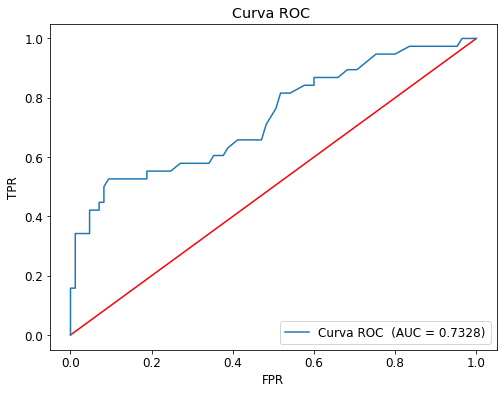

In [35]:
plot_roc_curve(y_test, y_test_pred_proba[:, 1], label = '')

## random forest

Encontrar los mejores hiperparámetros con Grid Search

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# params = {'criterion': ['gini', 'entropy'],
#           'max_depth': [5, 10, 20],
#           'min_samples_split': [10, 25, 50, 100],
#           'n_estimators': [25, 50, 100, 150],
#           'random_state': [seed]}

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10],
          'min_samples_split': [10, 25, 50],
          'n_estimators': [25, 50, 100],
          'random_state': [seed]}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
rf = RandomForestClassifier()

In [40]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
gs = GridSearchCV(estimator = rf, param_grid = params, scoring = 'roc_auc')

In [42]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_split': [10, 25, 50],
                         'n_estimators': [25, 50, 100],
                         'random_state': [12345]},
             scoring='roc_auc')

In [43]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50,
                       random_state=12345)

In [44]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 50,
 'random_state': 12345}

In [45]:
gs.best_score_

0.7687635352648522

usamos el mejor random forest para evaluar el test

In [46]:
best_rf = gs.best_estimator_

In [47]:
y_test_pred_proba = best_rf.predict_proba(X_test)[:,1]

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(y_test, y_test_pred_proba)

0.760061919504644

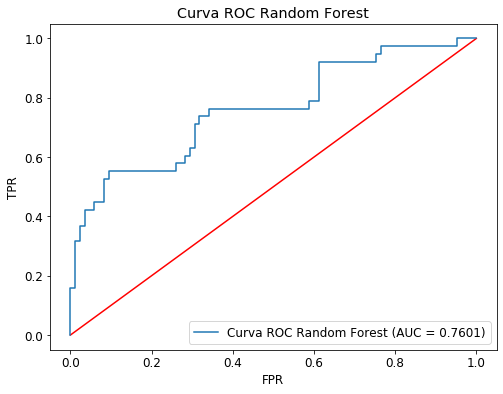

In [50]:
plot_roc_curve(y_test, y_test_pred_proba, 'Random Forest')

Importancia de variables

In [51]:
best_rf.feature_importances_

array([0.01146114, 0.07218219, 0.05507989, 0.05576436, 0.02247003,
       0.43215214, 0.0022592 , 0.00717535, 0.00916068, 0.00716846,
       0.01436854, 0.00623295, 0.08044629, 0.07840057, 0.05690328,
       0.08877492])

In [52]:
importances = pd.DataFrame({'columna': X_train.columns, 'importance_rf': best_rf.feature_importances_})

In [53]:
importances.sort_values(by = 'importance_rf', ascending = False)

,columna,importance_rf
5,Credit_History,0.432152
15,%Cuota,0.088775
12,TotalIncome,0.080446
13,TotalIncomeByPerson,0.078401
1,ApplicantIncome,0.072182
14,Cuota,0.056903
3,LoanAmount,0.055764
2,CoapplicantIncome,0.055080
4,Loan_Amount_Term,0.022470
10,Property_Area_Semiurban,0.014369


## random forest - boruta

Documentación https://github.com/scikit-learn-contrib/boruta_py

In [55]:
from boruta import BorutaPy

In [56]:
boruta = BorutaPy(estimator = best_rf, n_estimators = 'auto', max_iter = 100)
boruta.fit(X_train.values, y_train.values)

BorutaPy(estimator=RandomForestClassifier(max_depth=10, min_samples_split=10,
                                          n_estimators=24,
                                          random_state=RandomState(MT19937) at 0x10B4436B0),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x10B4436B0)

In [57]:
X_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota'],
      dtype='object')

In [58]:
boruta.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True])

In [59]:
boruta.support_weak_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [60]:
boruta.get_params()

{'alpha': 0.05,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 10,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 10,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 24,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': RandomState(MT19937) at 0x10B4436B0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=24,
                        random_state=RandomState(MT19937) at 0x10B4436B0),
 'max_iter': 100,
 'n_estimators': 'auto',
 'perc': 100,
 'random_state': RandomState(MT19937) at 0x10B4436B0,
 'two_step': True,
 'verbose': 

In [61]:
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()

In [62]:
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['Credit_History', 'TotalIncome', '%Cuota']
features in the blue area: []
